In [ ]:
from google.colab import files
uploaded = files.upload()


Saving udemy_output_All_Finance__Accounting_p1_p626.csv to udemy_output_All_Finance__Accounting_p1_p626.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('udemy_output_All_Finance__Accounting_p1_p626.csv')

# View basic info
print(df.shape)
df.head()


(13608, 20)


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [ ]:
# Show column names and datatypes
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

,0
id,0
title,0
url,0
is_paid,0
num_subscribers,0
avg_rating,0
avg_rating_recent,0
rating,0
num_reviews,0
is_wishlisted,0


In [ ]:
# Drop unneeded columns
df_clean = df.drop(columns=[
    'id', 'url', 'discount_price__price_string', 'price_detail__price_string'
])

# Convert published_time to datetime
df_clean['published_time'] = pd.to_datetime(df_clean['published_time'])

# Extract date features
df_clean['published_year'] = df_clean['published_time'].dt.year
df_clean['published_month'] = df_clean['published_time'].dt.month

# Drop original date columns
df_clean = df_clean.drop(columns=['created', 'published_time'])

# Fill missing prices with 0 (for free courses or unclear pricing)
df_clean['discount_price__amount'] = df_clean['discount_price__amount'].fillna(0)
df_clean['price_detail__amount'] = df_clean['price_detail__amount'].fillna(0)

# Fill missing currencies with 'UNK'
df_clean['discount_price__currency'] = df_clean['discount_price__currency'].fillna('UNK')
df_clean['price_detail__currency'] = df_clean['price_detail__currency'].fillna('UNK')

# Encode categorical features
df_clean = pd.get_dummies(df_clean, columns=[
    'is_paid', 'is_wishlisted', 'discount_price__currency', 'price_detail__currency'
], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Drop non-numeric or text columns like 'title'
X = df_clean.drop(columns=['num_subscribers', 'title'])
y = df_clean['num_subscribers']

# Confirm all features are numeric
print(X.select_dtypes(include='object').columns)



Index([], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 38749594.02374939
R² Score: 0.6759714829611344


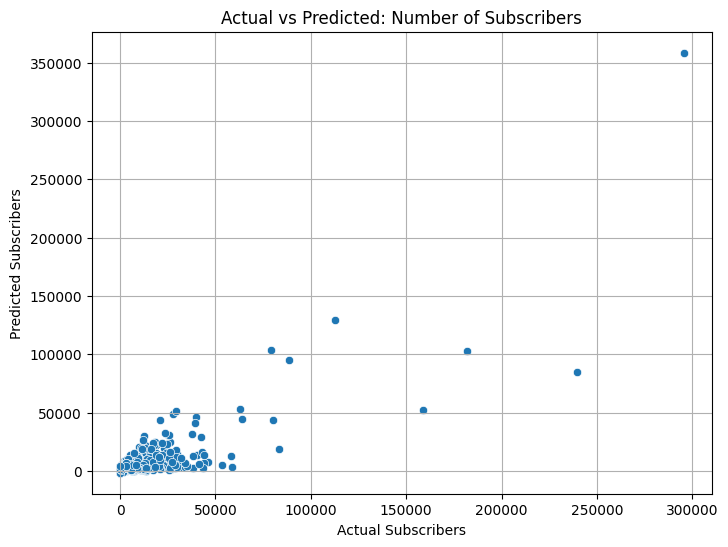

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")
plt.title("Actual vs Predicted: Number of Subscribers")
plt.grid(True)
plt.show()


In [ ]:
# Create a DataFrame to inspect feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display top positive and negative contributors
print(importance.head(10))     # Most positive influence
print(importance.tail(10))     # Most negative influence


                         Feature  Coefficient
12    price_detail__currency_UNK  1375.116004
1              avg_rating_recent   341.788402
2                         rating   341.788402
4         num_published_lectures    13.332177
3                    num_reviews     4.548448
7           price_detail__amount     0.171033
6         discount_price__amount    -0.907730
9                published_month   -54.535037
5   num_published_practice_tests   -99.777628
8                 published_year  -236.818672
                         Feature  Coefficient
4         num_published_lectures    13.332177
3                    num_reviews     4.548448
7           price_detail__amount     0.171033
6         discount_price__amount    -0.907730
9                published_month   -54.535037
5   num_published_practice_tests   -99.777628
8                 published_year  -236.818672
0                     avg_rating  -630.835690
11  discount_price__currency_UNK -1863.491523
10                  is_paid_True -

/tmp/ipython-input-12-3086061768.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients.head(top_n), x='Coefficient', y='Feature', palette='viridis')


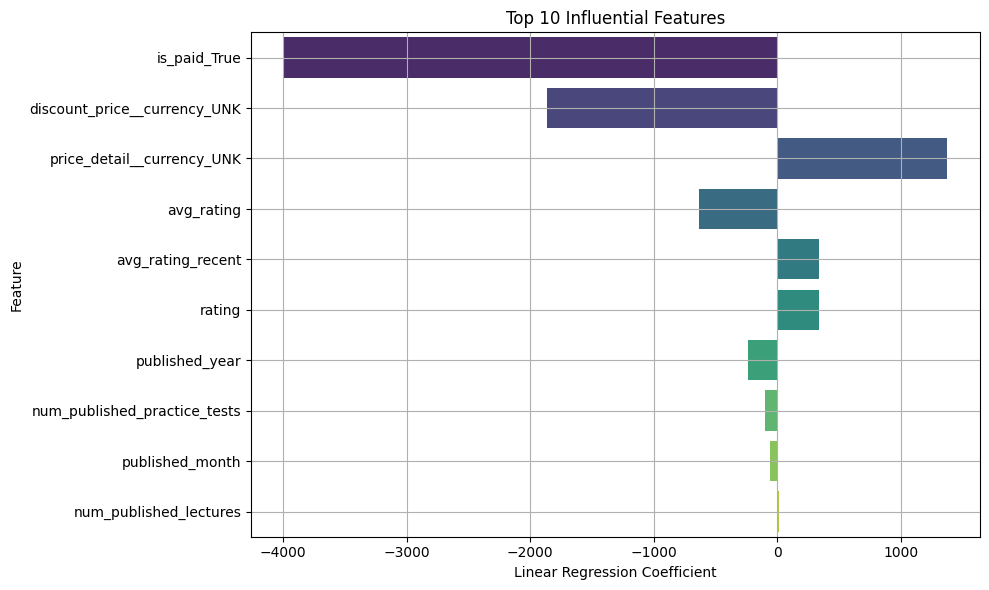

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a DataFrame of feature importances
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

# Sort by absolute value for visual impact
coefficients['abs_coef'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='abs_coef', ascending=False)

# Plot top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients.head(top_n), x='Coefficient', y='Feature', palette='viridis')
plt.title(f'Top {top_n} Influential Features')
plt.xlabel('Linear Regression Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()
